In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

import tensorflow as tf

In [3]:
import pandas as pd

data = np.loadtxt('../week2_lab/data/data_w3_ex1.csv', delimiter=',')
df = pd.read_csv('../week2_lab/data/data_w3_ex1.csv', header=None, names=["x1","y"])

In [4]:
df.head()

,x1,y
0,1651.000000,432.645217
1,1691.816327,454.935530
2,1732.632653,471.525248
3,1773.448980,482.506389
4,1814.265306,468.357886


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      50 non-null     float64
 1   y       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


## Regression

In [6]:
# SPlit the feature and target

X = df["x1"]
y = df["y"]

X = np.expand_dims(X, axis=1)
y = np.expand_dims(y, axis=1)

X[:5], y[:5]

(array([[1651.        ],
        [1691.81632653],
        [1732.63265306],
        [1773.44897959],
        [1814.26530612]]),
 array([[432.64521724],
        [454.93552962],
        [471.52524758],
        [482.50638875],
        [468.35788634]]))

In [7]:
X.shape, y.shape

((50, 1), (50, 1))

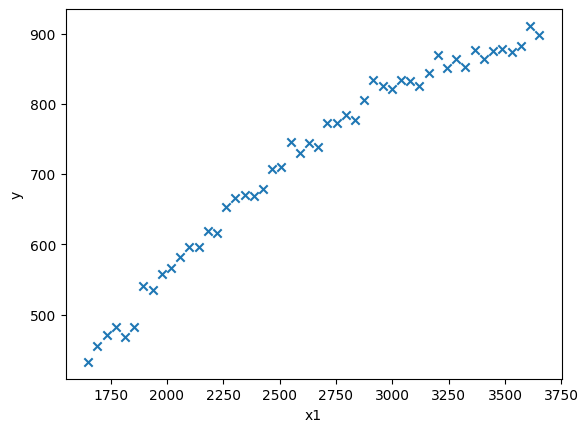

In [8]:
plt.scatter(X, y, marker="x")
plt.xlabel("x1")
plt.ylabel("y");

### Split data into train,devset,test

In [9]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables X_, y_
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=1)

# Split 40% subset above into two: half for devset and the other half for test
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)

# Delete X_ and y_
del X_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


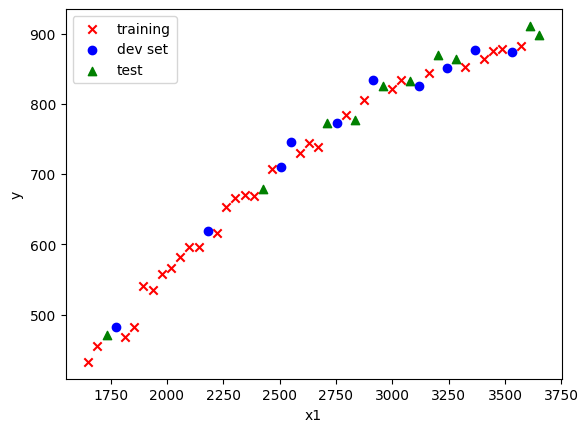

In [10]:
plt.scatter(X_train, y_train, marker="x", c="red")
plt.scatter(X_cv, y_cv, marker="o", c="blue")
plt.scatter(X_test, y_test, marker="^", c="green")
plt.legend(["training","dev set", "test"])
plt.xlabel("x1")
plt.ylabel("y");

### Feature Scaling

StandardScaler = z-score method $$ z = \frac{x - \mu}{\sigma} $$

In [11]:
# scaling the input data with z-score method
scalar_linear = StandardScaler()

X_train_scaled = scalar_linear.fit_transform(X_train)

print(f"Mean of the training set {scalar_linear.mean_.squeeze():.2f}")
print(f"Standard Deviation of the training set {scalar_linear.scale_.squeeze():.2f}")

Mean of the training set 2504.06
Standard Deviation of the training set 574.85


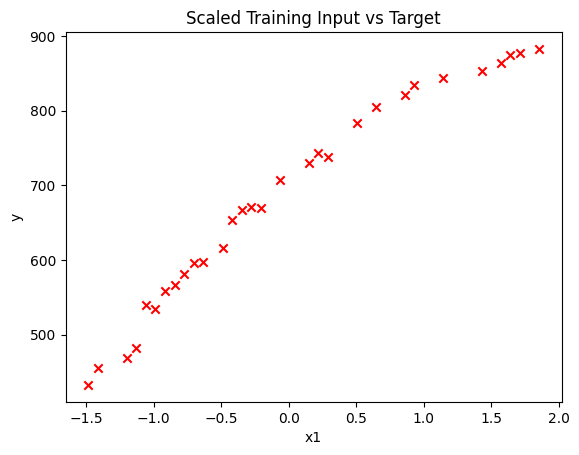

In [12]:
plt.scatter(X_train_scaled, y_train, marker="x", c="red")
plt.title("Scaled Training Input vs Target")
plt.xlabel("x1")
plt.ylabel("y");

### Train the model

Training using linear regression model

In [13]:
linear_model = LinearRegression()

#fitting the model to X_train_scaled and y_train
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
# Get the predictions
y_train_hat = linear_model.predict(X_train_scaled)

y_train_hat[0], y_train[0]

(array([876.15699636]), array([853.00601315]))

In [15]:
# Using scikit-learn lib to get the mse
print(f"MSE of scaled training set: {mean_squared_error(y_train, y_train_hat) / 2}")

MSE of scaled training set: 406.1937419253314


Divide by 2 bcs the doc said that mse from scikit-learn is not using the convention like this equation
$$J_{cv}(\vec{w}, b) = \frac{1}{2m_{cv}}\left[\sum_{i=1}^{m_{cv}}(f_{\vec{w},b}(\vec{x}_{cv}^{(i)}) - y_{cv}^{(i)})^2\right]$$

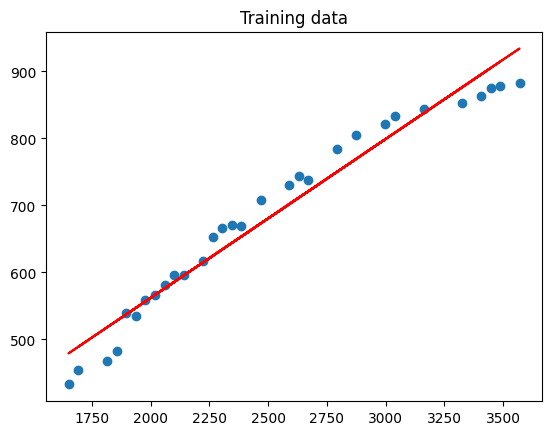

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_train_hat, c="red")
plt.title("Training data");

In [17]:
# scaling the cv data with z-score method
X_cv_scaled = scalar_linear.transform(X_cv) # only uses transform to get the same std and mean from the X_train

# Make predictions
y_cv_hat = linear_model.predict(X_cv_scaled)

print(f"Mean used to scale the dev set: {scalar_linear.mean_.squeeze():.2f}")
print(f"Standard Deviation used to scale the dev set: {scalar_linear.scale_.squeeze():.2f}")
print(f"Dev set MSE: {mean_squared_error(y_cv, y_cv_hat) / 2}")

Mean used to scale the dev set: 2504.06
Standard Deviation used to scale the dev set: 574.85
Dev set MSE: 551.7789026952212


### Adding Polynomial Feature

In [18]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_mapped = poly.fit_transform(X_train)

X_train_mapped[:5]

array([[3.32446939e+03, 1.10520967e+07],
       [2.34487755e+03, 5.49845073e+06],
       [3.48773469e+03, 1.21642933e+07],
       [2.63059184e+03, 6.92001341e+06],
       [2.58977551e+03, 6.70693719e+06]])

In [19]:
# scaling poly
scaler_poly = StandardScaler()

X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

X_train_mapped_scaled[:5]

array([[ 1.42715997,  1.47236856],
       [-0.27691164, -0.36461881],
       [ 1.71117191,  1.84025141],
       [ 0.22010925,  0.1055935 ],
       [ 0.14910627,  0.03511397]])

In [20]:
# Fitting the model
poly_model = LinearRegression()
poly_model.fit(X_train_mapped_scaled, y_train)

y_train_poly_hat = poly_model.predict(X_train_mapped_scaled)

# Dev set 
# Add poly feature
X_cv_mapped = poly.transform(X_cv)

# Scale the dev set data
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Predict the cv
y_cv_poly_hat = poly_model.predict(X_cv_mapped_scaled)

print("Training MSE:",mean_squared_error(y_train, y_train_poly_hat)/2)
print("CV MSE:",mean_squared_error(y_cv, y_cv_poly_hat)/2)

Training MSE: 49.11160933402496
CV MSE: 87.69841211111903


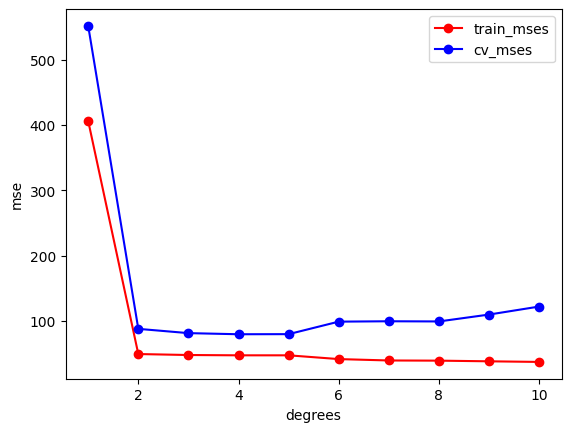

In [21]:
# Try different polynomial degrees

train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

for deg in range(1,11):

    ### For training set ###
    # Add poly
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    polys.append(poly)

    # Scale 
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # Train Model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train)
    models.append(model)

    # MSE in train set
    y_train_hat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, y_train_hat) / 2
    train_mses.append(train_mse)

    ### For CV set ###
    # transform to poly
    X_cv_mapped = poly.transform(X_cv)
    
    # Scale
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # MSE in cv set
    y_cv_hat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, y_cv_hat) / 2
    cv_mses.append(cv_mse)

deg = range(1,11)
plt.plot(deg, train_mses, c='red',marker="o")
plt.plot(deg, cv_mses, c='blue',marker="o")
plt.xlabel("degrees")
plt.ylabel("mse")
plt.legend(["train_mses","cv_mses"]);

In [22]:
degree = np.argmin(cv_mses)
print("Lowest cv mse is found in the model with degree",degree+1) # start from 0, so add 1

Lowest cv mse is found in the model with degree 4


In [23]:
# Fit into the test set

# Add polynomial feature to the test set
X_test_mapped = polys[degree].transform(X_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree].transform(X_test_mapped)

# Find the mse
y_test_hat = models[degree].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, y_test_hat) / 2

print("MOdel with polynomial degree 4")
print("training set mse:", train_mses[degree])
print("cv mse:", cv_mses[degree])
print("test mse:", test_mse)

MOdel with polynomial degree 4
training set mse: 47.14646644263652
cv mse: 79.43134912070143
test mse: 104.63168205289548


In [24]:
X_test_mapped_scaled.shape

(10, 4)

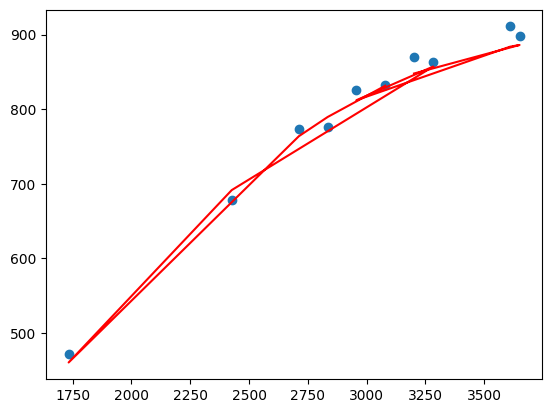

In [25]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_hat, c='red');

## Neural Network